### Instagram Analysis and Like Prediction

In [118]:
import instaloader #for scarping data 
from itertools import dropwhile, takewhile
import os
import sys
from datetime import datetime
import pandas as pd
import json
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [119]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

In [120]:
import re

import nltk
from nltk.corpus import stopwords

In [121]:
from nltk.stem import PorterStemmer
import nltk
from nltk.stem import WordNetLemmatizer
from collections import Counter
from sklearn.feature_extraction import DictVectorizer
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split

# scrapping data from instagram using instaloader

In [5]:
def get_instagram_posts(username, startdate, enddate):
    # Create an instaloader object with parameters
    for i in username:
        L = instaloader.Instaloader(download_pictures = False, download_videos = False, download_comments= False, compress_json = False)
   
    # Log in with the instaloader object
        L.login("username" , "qwertyuiop@123")#my username and password
    # Search the instagram profile
        profile = instaloader.Profile.from_username(L.context, username)
    # Scrape the posts
        posts = profile.get_posts()
        for post in takewhile(lambda p: p.date > startdate, dropwhile(lambda p : p.date > enddate, posts)): 
            print(post.date)
            L.download_post(post, target = profile.username)

In [6]:

username = "wordswink"
# date range fr scrapping the posts
startdate = datetime(2016, 1, 1)
enddate = datetime(2022, 12, 1)
# get your current working directory
current_wkdir = os.getcwd()
# Call the function. This will automatically store all the scrape data in a folder in your current working directory
get_instagram_posts(username, startdate, enddate)

2022-07-24 04:36:26
[Unsaid words🙊 .  .  .  .  .  …] unchanged json 
2022-07-23 08:35:55
[Message 👉🏻 @megha__mentor🔥 Sh…] unchanged json 
2022-07-22 13:41:58
[Saying a little says a lot🙌🏻 …] unchanged json 
2022-07-20 04:07:42
[That's How Partners Are Choos…] unchanged json 
2022-07-18 03:53:47
[🤍 .  .  .  .  .  .  #wordswin…] unchanged json 
2022-07-16 03:52:14
[Mystery to Miracle🤍 .  .  .  …] unchanged json 
2022-07-14 04:55:17
[Put yourself first 🤍 .  .  . …] unchanged json 
2022-07-12 04:37:40
[Keep them away!  .  .  .  .  …] unchanged json 
2022-07-10 05:11:24
[Be like salt!  .  .  .  .  . …] unchanged json 
2022-07-08 04:34:15
[Also are rare!  .  .  .  .  .…] unchanged json 
2022-07-06 04:19:24
[Healed my wounds🤍 .  .  .  . …] unchanged json 
2022-07-04 04:33:38
[After ages!  .  .  .  .  .  .…] unchanged json 
2022-07-01 04:03:41
[Tag such🤍 .  .  .  .  .  .  #…] unchanged json 
2022-06-28 04:51:25
[Make your own path🤍 .  .  .  …] unchanged json 
2022-06-26 04:23:44
[His gaze🤍 .  

[🤍 .  .  .  .  .  #priwrites_ …] unchanged json 
2021-09-23 12:34:20
[Self trust🤍 .  .  .  .  .  . …] unchanged json 
2021-09-18 04:10:39
[Your own kinda version🤍 .  . …] unchanged json 
2021-09-16 04:48:14
[Do share if relatable🤍 .  .  …] unchanged json 
2021-09-13 04:30:27
[Bloom 🤍 .  .  .  .  .  #priwr…] unchanged json 
2021-09-09 04:58:47
[So better to keep them🤍 .  . …] unchanged json 
2021-09-01 04:06:34
[Lot in little🤍 .  .  .  .  . …] unchanged json 
2021-08-28 04:41:19
[Do share if you agree🤍 .  .  …] unchanged json 
2021-08-24 05:37:44
[Jealousy is cute🤍 .  .  .  . …] unchanged json 
2021-08-21 13:24:35
[🤍 .  .  .  .  .  .  #priwrite…] unchanged json 
2021-08-18 05:23:34
[Loser to leader 🤍 .  .  .  . …] unchanged json 
2021-08-12 03:57:03
[Do share with someone 🤍 .  . …] unchanged json 
2021-08-09 04:13:40
[Easy way to ignore the world🤍…] unchanged json 
2021-08-05 04:40:39
[🤍 .  .  .  .  .  .  #poetsofi…] unchanged json 
2021-08-02 04:03:36
[Oneloveforever🤍 .  .  .  .  .…] u

[No option!  .  .  .  .  .  . …] unchanged json 
2022-05-28 03:33:29
[Learn to heal🤍 .  .  .  .  . …] unchanged json 
2022-05-26 03:53:58
[She never pretends;)  .  .  .…] unchanged json 
2022-05-24 04:02:34
[Bunked lectures <3 .  .  .  .…] unchanged json 
2022-05-22 04:09:09
[Just a step forward🐾 .  .  . …] unchanged json 
2022-05-20 04:12:26
[It has duplicates but never d…] unchanged json 
2022-05-17 04:02:40
[Chasing won't make you chosen…] unchanged json 
2022-05-14 03:34:16
[Right will light🤍 .  .  .  . …] unchanged json 
2022-05-11 03:49:02
[Intution never lies:)  .  .  …] unchanged json 
2022-05-08 04:26:27
[Mom👑 .  .  .  .  .  .  #words…] unchanged json 
2022-05-04 03:26:12
[Re-start needs a different wa…] unchanged json 
2022-04-29 04:47:18
[Do share if you agree .  .  .…] unchanged json 
2022-04-26 02:18:16
[Change the route;)  .  .  .  …] unchanged json 
2022-04-22 03:51:25
[Paxton or Ben  .  .  .  .  . …] unchanged json 
2022-04-19 04:54:18
[Infinite years🤍 .  .  .  .  .…] u

[Bitter truth🙌🏻  . . . . #deep…] unchanged json 
2020-12-11 05:51:23
[The endless love🖤  . . . . . …] unchanged json 
2020-12-08 04:10:40
[why promises are taken for gr…] unchanged json 
2020-10-05 15:50:18
[Don't quit trying🖤 . . . . . …] unchanged json 
2020-09-23 02:31:57
[🌝 . . . #Deepwords_#bittertru…] unchanged json 
2020-09-09 02:49:38
[Sacrificeofdreams for toomany…] unchanged json 
2020-09-06 04:21:35
[🌝 . . . #deepwords #fact #quo…] unchanged json 
2020-09-04 09:29:19
[#deepwords #bepatient #havepa…] unchanged json 
2022-07-24 04:36:26
[Unsaid words🙊 .  .  .  .  .  …] unchanged json 
2022-07-23 08:35:55
[Message 👉🏻 @megha__mentor🔥 Sh…] unchanged json 
2022-07-22 13:41:58
[Saying a little says a lot🙌🏻 …] unchanged json 
2022-07-20 04:07:42
[That's How Partners Are Choos…] unchanged json 
2022-07-18 03:53:47
[🤍 .  .  .  .  .  .  #wordswin…] unchanged json 
2022-07-16 03:52:14
[Mystery to Miracle🤍 .  .  .  …] unchanged json 
2022-07-14 04:55:17
[Put yourself first 🤍 .  .  . …] u

[She never pretends what she i…] unchanged json 
2021-06-24 05:22:10
[Never!  .  .  .  .  .  .  .  …] unchanged json 
2021-06-20 08:44:12
[Bold he is softest for his da…] unchanged json 
2021-06-19 05:15:03
[Coins of happiness🤍 .  .  .  …] unchanged json 
2021-06-15 05:53:49
[Time changes but not feelings…] unchanged json 
2021-06-12 04:33:16
[Jealous people never apprecia…] unchanged json 
2021-06-09 13:17:27
[Even imperfections are perfec…] unchanged json 
2021-06-02 12:40:50
[🌼 .  .  .  .  .  .  #priwrite…] unchanged json 
2021-05-26 12:16:06
[🤍 .  .  .  .  .  .  #priwrite…] unchanged json 
2021-05-23 05:55:36
[🤍 .  .  .  .  .  .  .  #priwr…] unchanged json 
2021-05-19 10:58:09
[Stories of us:)  .  .  .  .  …] unchanged json 
2021-05-16 04:13:19
[Woman holds the crown🤍 .  .  …] unchanged json 
2021-05-12 11:57:40
[Unexpected to unbreakable 🤍 .…] unchanged json 
2021-05-10 04:44:58
[Fake forevers🤫 .  .  .  .  . …] unchanged json 
2021-05-08 05:37:42
[For others “be a dream”🤍 .  .…] u

[आदत सी आफत 🤍 .  .  .  .  .  #…] unchanged json 
2021-10-23 13:36:06
[🤞🏻 .  .  .  .  .  .  #wordswi…] unchanged json 
2021-10-18 05:20:05
[Singing heart always cheers🤍 …] unchanged json 
2021-10-13 06:20:55
[Ocean and wave🤍 .  .  .  .  .…] unchanged json 
2021-10-09 03:43:52
[Remember:)  .  .  .  .  .  . …] unchanged json 
2021-10-04 05:14:01
[At some point... you realise …] unchanged json 
2021-10-01 14:16:44
[Do share if you agree🤍 .  .  …] unchanged json 
2021-09-27 04:31:21
[🤍 .  .  .  .  .  #priwrites_ …] unchanged json 
2021-09-23 12:34:20
[Self trust🤍 .  .  .  .  .  . …] unchanged json 
2021-09-18 04:10:39
[Your own kinda version🤍 .  . …] unchanged json 
2021-09-16 04:48:14
[Do share if relatable🤍 .  .  …] unchanged json 
2021-09-13 04:30:27
[Bloom 🤍 .  .  .  .  .  #priwr…] unchanged json 
2021-09-09 04:58:47
[So better to keep them🤍 .  . …] unchanged json 
2021-09-01 04:06:34
[Lot in little🤍 .  .  .  .  . …] unchanged json 
2021-08-28 04:41:19
[Do share if you agree🤍 .  .  …] u

[Don't trust blindly!  .  .  .…] unchanged json 
2022-06-20 13:29:48
[Conversations to complication…] unchanged json 
2022-06-17 03:31:13
[Limited talks to limited peop…] unchanged json 
2022-06-15 03:44:53
[HardWork🌚 .  .  .  .  .  #wor…] unchanged json 
2022-06-12 04:00:54
[Put on earphones and ignore t…] unchanged json 
2022-06-09 03:37:31
[Open book🤍 .  .  .  .  .  .  …] unchanged json 
2022-06-05 04:16:38
[A good listener🙂 .  .  .  .  …] unchanged json 
2022-06-03 04:16:06
[No option!  .  .  .  .  .  . …] unchanged json 
2022-05-28 03:33:29
[Learn to heal🤍 .  .  .  .  . …] unchanged json 
2022-05-26 03:53:58
[She never pretends;)  .  .  .…] unchanged json 
2022-05-24 04:02:34
[Bunked lectures <3 .  .  .  .…] unchanged json 
2022-05-22 04:09:09
[Just a step forward🐾 .  .  . …] unchanged json 
2022-05-20 04:12:26
[It has duplicates but never d…] unchanged json 
2022-05-17 04:02:40
[Chasing won't make you chosen…] unchanged json 
2022-05-14 03:34:16
[Right will light🤍 .  .  .  . …] u

[Every lose is not loss 🤞🏻 . .…] unchanged json 
2021-01-03 03:40:51
[Count your flaws!! . . . . #d…] unchanged json 
2020-12-30 04:27:53
[Everything and everyone has a…] unchanged json 
2020-12-29 04:41:57
[Right time brings the luck !!…] unchanged json 
2020-12-27 04:26:44
[The bitter truth🙌🏻 . . . . . …] unchanged json 
2020-12-23 05:37:45
[The best therapy ❤️ . . . . .…] unchanged json 
2020-12-21 04:15:59
[No caption❤️ . . . . . . #dee…] unchanged json 
2020-12-16 04:48:15
[Bitter truth🙌🏻  . . . . #deep…] unchanged json 
2020-12-11 05:51:23
[The endless love🖤  . . . . . …] unchanged json 
2020-12-08 04:10:40
[why promises are taken for gr…] unchanged json 
2020-10-05 15:50:18
[Don't quit trying🖤 . . . . . …] unchanged json 
2020-09-23 02:31:57
[🌝 . . . #Deepwords_#bittertru…] unchanged json 
2020-09-09 02:49:38
[Sacrificeofdreams for toomany…] unchanged json 
2020-09-06 04:21:35
[🌝 . . . #deepwords #fact #quo…] unchanged json 
2020-09-04 09:29:19
[#deepwords #bepatient #havepa…] u

[Self satisfaction 🤍 .  .  .  …] unchanged json 
2021-07-19 04:16:07
[:)  .  .  .  .  .  .  #priwri…] unchanged json 
2021-07-16 14:01:59
[And if someone needs.. Do give🤍] unchanged json 
2021-07-14 03:21:16
[No never🤞🏻 .  .  .  .  .  .  …] unchanged json 
2021-07-12 03:46:57
[Quite tough :)  .  .  .  .  .…] unchanged json 
2021-07-08 03:48:49
[Cruel world and the innocent …] unchanged json 
2021-07-06 03:44:10
[Comment down if you can relat…] unchanged json 
2021-07-03 03:51:17
[She never pretends what she i…] unchanged json 
2021-06-24 05:22:10
[Never!  .  .  .  .  .  .  .  …] unchanged json 
2021-06-20 08:44:12
[Bold he is softest for his da…] unchanged json 
2021-06-19 05:15:03
[Coins of happiness🤍 .  .  .  …] unchanged json 
2021-06-15 05:53:49
[Time changes but not feelings…] unchanged json 
2021-06-12 04:33:16
[Jealous people never apprecia…] unchanged json 
2021-06-09 13:17:27
[Even imperfections are perfec…] unchanged json 
2021-06-02 12:40:50
[🌼 .  .  .  .  .  .  #priwrite…] 

In [7]:
L=instaloader.Instaloader()

In [8]:
profile = instaloader.Profile.from_username(L.context, username)

In [9]:
def parse_instafiles(username, path):
    """ 
    This function loads in all the json files generated by the      instaloader package and parses it into a csv file.
    """
    #print('Entering provided directory...')
    os.chdir(os.path.join(path,username))
    
    columns = ['filename', 'datetime', 'type', 'locations_id', 'locations_name', 'mentions', 'hashtags', 'video_duration' , 
               'followees','no_of_posts' , 'bio' , 'igtvcount']    
    dataframe = pd.DataFrame(columns=[])
    
    #print('Traversing file tree...')
    
    glob('*UTC.json')
    
    for file in glob('*UTC.json'):
        with open(file, 'r') as filecontent:
            filename = filecontent.name
            #print('Found JSON file: ' + filename + '. Loading...')
            
            try:
                metadata = json.loads(filecontent.read())
            
            except IOError as e:
                #print("I/O Error. Couldn't load file. Trying the next one...")
                continue
            else:
                pass
            #print('Collecting relevant metadata...')
            time = datetime.fromtimestamp(int(metadata['node']['taken_at_timestamp']))
            type_ = metadata['node']['__typename']
            likes = metadata['node']['edge_media_preview_like']['count']     
            comments = metadata['node']['edge_media_to_comment']['count']
            username = metadata['node']['owner']['username']
            followers = metadata['node']['owner']['edge_followed_by']['count']
            followees=profile.followees
            post_count=profile.mediacount
            bio = profile.biography,profile.external_url
            igtv = profile.igtvcount
            try:
                text = metadata['node']['edge_media_to_caption']['edges'][0]['node']['text']
            except:
                text = ""
            try:
                post_id = metadata['node']['id']
            except:
                post_id = ""
            minedata = {'filename': filename, 'time': time, 'text': text,
                    'likes': likes, 'comments' : comments, 'username' : username,  'followers' : followers,
                        'post_id' : post_id , 'followees' : followees , 'no_of_posts': post_count , 'bio' : bio , 'igtv_count': igtv}
            dataframe = dataframe.append(minedata, ignore_index=True)
            del metadata
            filecontent.close()
        dataframe['source'] = 'Instagram'
    return dataframe

In [10]:
df_instagram = parse_instafiles(username, os.getcwd())

In [11]:
df_instagram.to_csv('new_file.csv')

##  loading the dataset

In [122]:
instadf=pd.read_excel('instadata - Copy.xlsx')

# dataset exploration

In [123]:
instadf.head()

Unnamed: 0                      filename                time  \
0           0  2017-12-10_10-01-38_UTC.json 2017-12-10 15:31:38   
1           1  2017-12-20_09-01-11_UTC.json 2017-12-20 14:31:11   
2           2  2018-01-25_07-49-42_UTC.json 2018-01-25 13:19:42   
3           3  2018-02-01_11-29-36_UTC.json 2018-02-01 16:59:36   
4           4  2018-02-08_10-20-38_UTC.json 2018-02-08 15:50:38   

                                                text  likes  comments  \
0  Frank The Fat Horse\nCartoon-Box 17\n\n#cartoo...  38693       223   
1  Cleaning the Museum\nCartoon-Box 65\nPlease su...  32389        65   
2  How To Solve Erection Problems\nCartoon-Box 69...  55739      1368   
3  The Best Way To Deliver A Baby\nCartoon-Box 70...  56456       298   
4  How To Be A Good Neighbour\nCartoon-Box 71\n#c...  37761       227   

                username  followers              post_id  followees  \
0  cartoon_box_animation    1816763  1666647453708273837        586   
1  cartoon_box_animation    1816763  1673864740483879658        586   
2  cartoon_box_animation    1816763  1699919137768706098        586   
3  cartoon_box_animation    1816763  1705104723752040129        586   
4  cartoon_box_animation    1816763  1710142745983936650        586   

   no_of_posts                                       bio  igtv_count  \
0         6693  ('founder', 'https://linktr.ee/therock')         512   
1         6693  ('founder', 'https://linktr.ee/therock')         512   
2         6693  ('founder', 'https://linktr.ee/therock')         512   
3         6693  ('founder', 'https://linktr.ee/therock')         512   
4         6693  ('founder', 'https://linktr.ee/therock')         512   

      source  
0  Instagram  
1  Instagram  
2  Instagram  
3  Instagram  
4  Instagram

In [56]:
instadf.describe()

Unnamed: 0         likes       comments     followers       post_id  \
count  6344.000000  6.344000e+03    6344.000000  6.344000e+03  6.344000e+03   
mean   2071.685372  8.551318e+05    5356.249527  2.642869e+08  2.084563e+18   
std    1617.506994  1.047400e+06    8533.518267  1.314127e+08  5.082816e+17   
min       0.000000 -1.000000e+00       0.000000  1.842500e+04  1.152556e+18   
25%     404.750000  2.762198e+05    1250.500000  3.297354e+08  1.658097e+18   
50%    1910.500000  5.339300e+05    2993.500000  3.297354e+08  2.184808e+18   
75%    3496.250000  1.038286e+06    6251.000000  3.297354e+08  2.521006e+18   
max    5082.000000  1.421217e+07  175783.000000  3.297354e+08  2.886334e+18   

         followees  no_of_posts   igtv_count  
count  6344.000000  6344.000000  6344.000000  
mean    553.950189  5749.279319   435.819830  
std     187.547406  2252.212758   181.764489  
min      46.000000   146.000000     0.000000  
25%     586.000000  6693.000000   512.000000  
50%     586.000000  6693.000000   512.000000  
75%     586.000000  6693.000000   512.000000  
max     996.000000  6693.000000   512.000000

In [57]:
instadf.likes.describe()

count    6.344000e+03
mean     8.551318e+05
std      1.047400e+06
min     -1.000000e+00
25%      2.762198e+05
50%      5.339300e+05
75%      1.038286e+06
max      1.421217e+07
Name: likes, dtype: float64

In [58]:
instadf.shape

(6344, 14)

In [59]:
instadf.dtypes

Unnamed: 0              int64
filename               object
time           datetime64[ns]
text                   object
likes                   int64
comments                int64
username               object
followers               int64
post_id                 int64
followees               int64
no_of_posts             int64
bio                    object
igtv_count              int64
source                 object
dtype: object

In [60]:
instadf.isnull().sum()

Unnamed: 0      0
filename        0
time            0
text           72
likes           0
comments        0
username        0
followers       0
post_id         0
followees       0
no_of_posts     0
bio             0
igtv_count      0
source          0
dtype: int64

In [ ]:
#removing all the null rows

In [124]:
instadf=instadf.dropna()

In [62]:
instadf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6272 entries, 0 to 6343
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   6272 non-null   int64         
 1   filename     6272 non-null   object        
 2   time         6272 non-null   datetime64[ns]
 3   text         6272 non-null   object        
 4   likes        6272 non-null   int64         
 5   comments     6272 non-null   int64         
 6   username     6272 non-null   object        
 7   followers    6272 non-null   int64         
 8   post_id      6272 non-null   int64         
 9   followees    6272 non-null   int64         
 10  no_of_posts  6272 non-null   int64         
 11  bio          6272 non-null   object        
 12  igtv_count   6272 non-null   int64         
 13  source       6272 non-null   object        
dtypes: datetime64[ns](1), int64(8), object(5)
memory usage: 735.0+ KB


In [ ]:
#removing the null unnecessary columns

In [125]:
instadf.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
#splitting the time into date and time

In [126]:
instadf[['date', 'time_s']] = instadf['time'].astype(str).str.split(' ', 1, expand=True)

In [127]:
instadf[['year', 'Month', 'Date']] = instadf['date'].str.split('-', expand=True)
instadf[['Hour', 'Minute', 'Sec']] = instadf['time_s'].str.split(':', expand=True)

In [66]:
instadf.columns

Index(['filename', 'time', 'text', 'likes', 'comments', 'username',
       'followers', 'post_id', 'followees', 'no_of_posts', 'bio', 'igtv_count',
       'source', 'date', 'time_s', 'year', 'Month', 'Date', 'Hour', 'Minute',
       'Sec'],
      dtype='object')

In [128]:
instadf.drop(['time','source'],axis=1,inplace=True)

In [129]:
cols=['year','Month','Date','Hour','Minute','Sec']

In [130]:
instadf[cols]=instadf[cols].astype(int)
#changing the datatypes

In [131]:
instadf=instadf.reset_index()

In [71]:
instadf['text'].head()

0    Frank The Fat Horse\nCartoon-Box 17\n\n#cartoo...
1    Cleaning the Museum\nCartoon-Box 65\nPlease su...
2    How To Solve Erection Problems\nCartoon-Box 69...
3    The Best Way To Deliver A Baby\nCartoon-Box 70...
4    How To Be A Good Neighbour\nCartoon-Box 71\n#c...
Name: text, dtype: object

In [132]:
instadf['date']=pd.to_datetime(instadf['date'])

In [73]:
instadf.describe()

index         likes       comments     followers       post_id  \
count  6272.000000  6.272000e+03    6272.000000  6.272000e+03  6.272000e+03   
mean   3150.246492  8.587371e+05    5370.263393  2.664264e+08  2.083239e+18   
std    1825.090267  1.046085e+06    8523.575784  1.297659e+08  5.108311e+17   
min       0.000000 -1.000000e+00       0.000000  1.842500e+04  1.152556e+18   
25%    1569.750000  2.844168e+05    1285.250000  3.297354e+08  1.652295e+18   
50%    3151.500000  5.372105e+05    3027.500000  3.297354e+08  2.178332e+18   
75%    4721.250000  1.040214e+06    6286.000000  3.297354e+08  2.524653e+18   
max    6343.000000  1.421217e+07  175783.000000  3.297354e+08  2.886334e+18   

         followees  no_of_posts   igtv_count         year        Month  \
count  6272.000000  6272.000000  6272.000000  6272.000000  6272.000000   
mean    557.993941  5790.915179   439.246652  2019.037628     6.258769   
std     182.723199  2211.773272   178.339356     1.945974     3.565391   
min      46.000000   146.000000     0.000000  2016.000000     1.000000   
25%     586.000000  6693.000000   512.000000  2017.000000     3.000000   
50%     586.000000  6693.000000   512.000000  2019.000000     6.000000   
75%     586.000000  6693.000000   512.000000  2021.000000     9.000000   
max     996.000000  6693.000000   512.000000  2022.000000    12.000000   

              Date         Hour       Minute          Sec  
count  6272.000000  6272.000000  6272.000000  6272.000000  
mean     15.652902    11.604273    29.674426    29.243304  
std       8.724868     7.317936    17.113908    17.221644  
min       1.000000     0.000000     0.000000     0.000000  
25%       8.000000     5.000000    15.000000    14.000000  
50%      16.000000    11.000000    30.000000    29.000000  
75%      23.000000    18.000000    44.000000    44.000000  
max      31.000000    23.000000    59.000000    59.000000

In [ ]:
#outliers

C:\Users\kousa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='comments'>

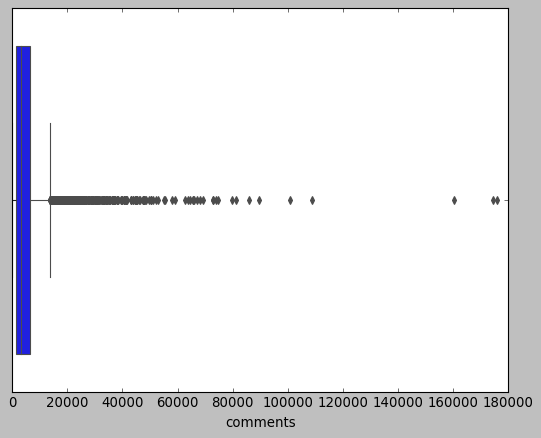

In [133]:
sns.boxplot(instadf['comments'])

In [134]:
Q1 = np.percentile(instadf['comments'], 15,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(instadf['comments'], 85,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

In [135]:
IQR

9236.5

In [136]:
upper = np.where(instadf['comments'] >= (Q3+1.5*IQR))
lower = np.where(instadf['comments'] <= (Q1-1.5*IQR))
 

In [78]:
upper

(array([ 312,  353,  413,  440,  996, 1508, 1559, 1697, 1940, 1960, 1976,
        2047, 2054, 2100, 2114, 2172, 2175, 2237, 2240, 2246, 2304, 2311,
        2328, 2386, 2417, 2428, 2432, 2451, 2487, 2527, 2539, 2548, 2556,
        2564, 2565, 2567, 2568, 2573, 2574, 2577, 2584, 2599, 2602, 2608,
        2610, 2617, 2634, 2653, 2681, 2689, 2695, 2699, 2704, 2716, 2734,
        2742, 2750, 2752, 2764, 2767, 2785, 2791, 2853, 2892, 2902, 2905,
        2918, 2919, 2931, 2947, 2948, 2949, 2973, 2982, 3027, 3050, 3063,
        3084, 3167, 3197, 3203, 3221, 3222, 3225, 3231, 3250, 3257, 3264,
        3268, 3292, 3296, 3303, 3307, 3308, 3310, 3325, 3331, 3436, 3437,
        3438, 3444, 3471, 3511, 3512, 3536, 3561, 3568, 3578, 3591, 3592,
        3609, 3652, 3657, 3659, 3661, 3666, 3671, 3677, 3684, 3713, 3762,
        3773, 3791, 3802, 3815, 3835, 3836, 3854, 3856, 3857, 3874, 3878,
        3898, 3910, 3925, 3932, 3935, 3936, 3958, 3962, 3984, 4003, 4007,
        4029, 4054, 4083, 4084, 4085, 

In [137]:
instadf['comments']=instadf['comments'].replace(upper,instadf['comments'].mean())
#replacing the outliers with mean

In [138]:
instadf['comments'] = (instadf['comments'] - instadf['comments'].mean()) / instadf['comments'].std()
#standardizing the comments columns

In [ ]:
#perform below code if data is scraped from multiple user account

In [139]:
#label_encoder = preprocessing.LabelEncoder()

In [140]:
# instadf['followers']= label_encoder.fit_transform(instadf['followers'])
  
# instadf['followers'].unique()


array([3, 5, 4, 2, 0, 1], dtype=int64)

In [141]:

# instadf['username']= label_encoder.fit_transform(instadf['username'])
  
# instadf['username'].unique()

array([0, 3, 1, 2, 4])

In [142]:
instadf.head()

index                      filename  \
0      0  2017-12-10_10-01-38_UTC.json   
1      1  2017-12-20_09-01-11_UTC.json   
2      2  2018-01-25_07-49-42_UTC.json   
3      3  2018-02-01_11-29-36_UTC.json   
4      4  2018-02-08_10-20-38_UTC.json   

                                                text  likes  comments  \
0  Frank The Fat Horse\nCartoon-Box 17\n\n#cartoo...  38693 -0.610739   
1  Cleaning the Museum\nCartoon-Box 65\nPlease su...  32389 -0.629294   
2  How To Solve Erection Problems\nCartoon-Box 69...  55739 -0.476274   
3  The Best Way To Deliver A Baby\nCartoon-Box 70...  56456 -0.601931   
4  How To Be A Good Neighbour\nCartoon-Box 71\n#c...  37761 -0.610269   

   username  followers              post_id  followees  no_of_posts  \
0         0          3  1666647453708273837        586         6693   
1         0          3  1673864740483879658        586         6693   
2         0          3  1699919137768706098        586         6693   
3         0          3  1705104723752040129        586         6693   
4         0          3  1710142745983936650        586         6693   

                                        bio  igtv_count       date    time_s  \
0  ('founder', 'https://linktr.ee/therock')         512 2017-12-10  15:31:38   
1  ('founder', 'https://linktr.ee/therock')         512 2017-12-20  14:31:11   
2  ('founder', 'https://linktr.ee/therock')         512 2018-01-25  13:19:42   
3  ('founder', 'https://linktr.ee/therock')         512 2018-02-01  16:59:36   
4  ('founder', 'https://linktr.ee/therock')         512 2018-02-08  15:50:38   

   year  Month  Date  Hour  Minute  Sec  
0  2017     12    10    15      31   38  
1  2017     12    20    14      31   11  
2  2018      1    25    13      19   42  
3  2018      2     1    16      59   36  
4  2018      2     8    15      50   38

In [86]:
instadf['text']

0       Frank The Fat Horse\nCartoon-Box 17\n\n#cartoo...
1       Cleaning the Museum\nCartoon-Box 65\nPlease su...
2       How To Solve Erection Problems\nCartoon-Box 69...
3       The Best Way To Deliver A Baby\nCartoon-Box 70...
4       How To Be A Good Neighbour\nCartoon-Box 71\n#c...
                              ...                        
6267    Keep them away! \n. \n. \n. \n. \n. \n. \n#wor...
6268    Put yourself first 🤍\n. \n. \n. \n. \n. \n. \n...
6269    Mystery to Miracle🤍\n. \n. \n. \n. \n. \n. \n#...
6270    🤍\n. \n. \n. \n. \n. \n. \n#wordswink #writing...
6271    That's How Partners Are Choosen🤍\n. \n. \n. \n...
Name: text, Length: 6272, dtype: object

In [87]:
## hashtag seperation from text

In [143]:
instadf[['description', 'hashtags']] = instadf['text'].astype(str).str.split('#', 1, expand=True)

In [144]:
instadf.head()

index                      filename  \
0      0  2017-12-10_10-01-38_UTC.json   
1      1  2017-12-20_09-01-11_UTC.json   
2      2  2018-01-25_07-49-42_UTC.json   
3      3  2018-02-01_11-29-36_UTC.json   
4      4  2018-02-08_10-20-38_UTC.json   

                                                text  likes  comments  \
0  Frank The Fat Horse\nCartoon-Box 17\n\n#cartoo...  38693 -0.610739   
1  Cleaning the Museum\nCartoon-Box 65\nPlease su...  32389 -0.629294   
2  How To Solve Erection Problems\nCartoon-Box 69...  55739 -0.476274   
3  The Best Way To Deliver A Baby\nCartoon-Box 70...  56456 -0.601931   
4  How To Be A Good Neighbour\nCartoon-Box 71\n#c...  37761 -0.610269   

   username  followers              post_id  followees  no_of_posts  ...  \
0         0          3  1666647453708273837        586         6693  ...   
1         0          3  1673864740483879658        586         6693  ...   
2         0          3  1699919137768706098        586         6693  ...   
3         0          3  1705104723752040129        586         6693  ...   
4         0          3  1710142745983936650        586         6693  ...   

        date    time_s  year Month  Date  Hour  Minute  Sec  \
0 2017-12-10  15:31:38  2017    12    10    15      31   38   
1 2017-12-20  14:31:11  2017    12    20    14      31   11   
2 2018-01-25  13:19:42  2018     1    25    13      19   42   
3 2018-02-01  16:59:36  2018     2     1    16      59   36   
4 2018-02-08  15:50:38  2018     2     8    15      50   38   

                                         description  \
0            Frank The Fat Horse\nCartoon-Box 17\n\n   
1  Cleaning the Museum\nCartoon-Box 65\nPlease su...   
2   How To Solve Erection Problems\nCartoon-Box 69\n   
3  The Best Way To Deliver A Baby\nCartoon-Box 70...   
4       How To Be A Good Neighbour\nCartoon-Box 71\n   

                                            hashtags  
0  cartoon #animated #trojanhorse #troy #horse #h...  
1  cartoon #animation #animated #funnyvideos #fun...  
2  cartoon #funny #erection #erectionproblems #fa...  
3  cartoon #animation #animated #funnyvideos #fun...  
4  cartoons #cartoon #animated #funnyvideo #funny...  

[5 rows x 22 columns]

In [91]:
#text that contains emojis

In [145]:
text = instadf['description'][5347]
print(text) # with emoji


⭐️⭐️👏🏾👏🏾👏🏾⭐️⭐️
A well earned CONGRATULATIONS to our cast of YOUNG ROCK for their 
BEST BROADCAST NETWORK SERIES 
NOMINATION from the @hollywoodcriticsassociation 🎬🏆 

To our cast & crew - on behalf of our Seven Bucks Productions - THANK YOU for your boundless talents and commitments to deliver for our audience at home 📺 

And a deep THANK YOU from me, personally to you for representing my family and both my Black & Samoan cultures with such resilience, some grace and as always - trying to find humor in the hard work and journey ❤️

Love U guys and congrats on YOUR NOMINATION. 

Season 3 here we come….




In [146]:
emoji_regexp = u'[\U00002600-\U000026FF]|[\U00002700-\U000027BF]|[\U0001f300-\U0001f5fF]|[\U0001f600-\U0001f64F]|' \
               u'[\U0001f680-\U0001f6FF]|[\U00002A00-\U00002AFF]|[\U0001F1E0-\U0001F1FF]'
re.findall(emoji_regexp, instadf['description'][4], re.UNICODE)

[]

In [147]:

emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002700-\U000027BF"
        u"\U00002A00-\U00002AFF"
        u"\U00002600-\U000026FF"
                           "]+", flags=re.UNICODE)
print(emoji_pattern.sub(r'', text)) # no emoji

⭐️⭐️⭐️⭐️
A well earned CONGRATULATIONS to our cast of YOUNG ROCK for their 
BEST BROADCAST NETWORK SERIES 
NOMINATION from the @hollywoodcriticsassociation  

To our cast & crew - on behalf of our Seven Bucks Productions - THANK YOU for your boundless talents and commitments to deliver for our audience at home  

And a deep THANK YOU from me, personally to you for representing my family and both my Black & Samoan cultures with such resilience, some grace and as always - trying to find humor in the hard work and journey ️

Love U guys and congrats on YOUR NOMINATION. 

Season 3 here we come….




In [148]:
instadf['description'][5678]

"Hahah, isn't this all of us by now!! \n.\n.\n"

In [149]:
letters_only = re.sub("[^a-zA-Z]",           # The pattern to search for
                      " ",                   # The pattern to replace it with
                      instadf['description'][5678]) 

In [150]:
letters_only

'Hahah  isn t this all of us by now        '

In [151]:
lower_case = letters_only.lower()        # Convert to lower case
words = lower_case.split()               # Split into words
words

['hahah', 'isn', 't', 'this', 'all', 'of', 'us', 'by', 'now']

In [152]:
#nltk.download('stopwords')

In [153]:
words = [w for w in words if not w in stopwords.words("english")]
words

['hahah', 'us']

In [154]:
" ".join(words)

'hahah us'

In [155]:
def cleanup(sentence):
    #letters_only = re.sub("[^a-zA-Z]", " ", sentence.split(', ')[0])
    #emojis = re.findall(emoji_regexp, sentence.split(', ')[0], re.UNICODE)
    try:
        letters_only = re.sub("[^a-zA-Z]", " ", sentence)
        emojis = re.findall(emoji_regexp, sentence, re.UNICODE)
    except:
        letters_only = ''
        emojis = []
    words = letters_only.lower().split()        
    words = [w for w in words if not w in stopwords.words("english")]
    words = [w for w in words if len(w) > 1]
    return (" ".join(words)), (" ".join(emojis))

In [156]:
sentence, emojis = cleanup(instadf['description'][5347])

In [157]:
sentence

'well earned congratulations cast young rock best broadcast network series nomination hollywoodcriticsassociation cast crew behalf seven bucks productions thank boundless talents commitments deliver audience home deep thank personally representing family black samoan cultures resilience grace always trying find humor hard work journey love guys congrats nomination season come'

In [158]:
emojis

'👏 🏾 👏 🏾 👏 🏾 🎬 🏆 📺 ❤'

In [159]:
instadf['description'].size

6272

In [160]:
clean = []
clean_emojis = []

In [161]:
clean = []
clean_emojis = []
for i in range( 0, instadf['description'].size ):
    if( (i+1)%1000 == 0 ):
        print(str(round(i/6344*100))+"% done")
    x,y = cleanup(instadf['description'][i])
    clean.append(x)
    clean_emojis.append(y)

16% done
32% done
47% done
63% done
79% done
95% done


In [162]:
len(clean)

6272

In [163]:
len(clean_emojis)

6272

In [164]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from nltk.tokenize import word_tokenize

### count vectorization

In [165]:
clean_vectorizer = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None, stop_words = None, max_features = 500) 
clean_features = clean_vectorizer.fit_transform(clean)
clean_features = clean_features.toarray()

In [166]:
clean_features.shape

(6272, 500)

In [167]:
clean_features.shape[0]

6272

In [168]:
vocab = clean_vectorizer.get_feature_names()
print(vocab)

['across', 'action', 'adam', 'ago', 'aka', 'along', 'already', 'also', 'always', 'amazing', 'animation', 'another', 'appreciate', 'around', 'art', 'asked', 'ass', 'athletes', 'audience', 'away', 'awesome', 'babies', 'baby', 'back', 'bad', 'bald', 'bar', 'beautiful', 'become', 'behind', 'best', 'better', 'big', 'biggest', 'bio', 'birthday', 'black', 'blood', 'body', 'book', 'bowl', 'box', 'boy', 'boys', 'brand', 'break', 'breaking', 'brilliant', 'bring', 'broke', 'brotha', 'brother', 'brown', 'bucks', 'buddy', 'build', 'building', 'business', 'call', 'called', 'came', 'care', 'career', 'cartoon', 'cause', 'change', 'character', 'cheat', 'check', 'cheers', 'china', 'christmas', 'ck', 'co', 'come', 'comes', 'coming', 'congrats', 'congratulations', 'continue', 'cool', 'core', 'could', 'country', 'cover', 'crazy', 'create', 'created', 'crew', 'cruise', 'culture', 'dad', 'daddy', 'daily', 'danygarciaco', 'day', 'days', 'dc', 'deep', 'delicious', 'deliver', 'different', 'director', 'disney', 

C:\Users\kousa\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [169]:
new_vocab = []
for word in vocab:
    if len(word)>5:
        new_vocab.append(word)
print (' '.join(new_vocab))

across action already always amazing animation another appreciate around athletes audience awesome babies beautiful become behind better biggest birthday breaking brilliant brotha brother building business called career cartoon change character cheers christmas coming congrats congratulations continue country create created cruise culture danygarciaco delicious deliver different director disney dreams dwanta energy enough entire everyone everything excited exciting exclusive experience extremely families family father favorite finally follow football forward founder friday friend friends furious getting giving global grateful gratitude greatest greatness growing growth hardest hawaii healthy highest highly history hollywood honored hungry iconic important importantly incredible inspired inspiring johnson journey jumanji jungle kevinhart ladies laurenhashianofficial little looking loving mahalo making massive meeting moment months morning nbctitangames needed netflix nothing notice offi

In [170]:
clean_features = pd.DataFrame(data=clean_features, columns=vocab)
clean_features.head()
#vectorized data of text with top count

across  action  adam  ago  aka  along  already  also  always  amazing  ...  \
0       0       0     0    0    0      0        0     0       0        0  ...   
1       0       0     0    0    0      0        0     0       0        0  ...   
2       0       0     0    0    0      0        0     0       0        0  ...   
3       0       0     0    0    0      0        0     0       0        0  ...   
4       0       0     0    0    0      0        0     0       0        0  ...   

   ya  year  years  yes  yet  young  yr  yrs  zoa  zoaenergy  
0   0     0      0    0    0      0   0    0    0          0  
1   0     0      0    0    0      0   0    0    0          0  
2   0     0      0    0    0      0   0    0    0          0  
3   0     0      0    0    0      0   0    0    0          0  
4   0     0      0    0    0      0   0    0    0          0  

[5 rows x 500 columns]

In [171]:
from collections import Counter
from sklearn.feature_extraction import DictVectorizer
clean_emojis_vectorizer = DictVectorizer()
#description_emojis_vectorizer = CountVectorizer() 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
#X = description_vectorizer.fit(emojis)
#clean_description_emojis_features = description_vectorizer.transform(clean_description_emojis)
X = clean_emojis_vectorizer.fit_transform(Counter(s.split()) for s in clean_emojis)

# Numpy arrays are easy to work with, so convert the result to an 
# array
clean_emojis_features = X.toarray()

In [172]:
clean_emojis_features.shape

(6272, 452)

In [173]:
#create list of unique emojis
emojis = set()
for i in range (clean_emojis_features.shape[0]):
    if clean_emojis[i]:
        for emoji in clean_emojis[i].split():
            emojis.add(emoji)
emojis = list(emojis)
test = np.zeros(shape=(clean_emojis_features.shape[0],clean_emojis_features.shape[1]))

#create sentence to vector
for i in range (clean_emojis_features.shape[0]):
    if clean_emojis[i]:
        for emoji in clean_emojis[i].split():
            test[i][emojis.index(emoji)]+=1

In [174]:
test_emoji = np.zeros(shape=(1,clean_emojis_features.shape[1]))
for i in range (clean_emojis_features.shape[0]):
    for j in range(clean_emojis_features.shape[1]):
        if test[i][j] > 0:
            test_emoji[:,j]+=test[i][j]

In [175]:
count = 0
count_list = []
for i in range(clean_emojis_features.shape[1]):
    if test_emoji[:,i]>175:
        count+=1
        count_list.append(i)
count_list

[23, 48, 49, 93, 103, 130, 198, 307, 334, 336, 376, 404, 428, 430]

In [176]:
clean_features_emoji = pd.DataFrame(data=test[:,count_list])
clean_features_emoji.describe()
#vectorized data of emojis

0            1            2            3            4   \
count  6272.000000  6272.000000  6272.000000  6272.000000  6272.000000   
mean      0.051499     0.052136     0.045918     0.041454     0.099649   
std       0.230218     0.317951     0.216809     0.201739     0.393034   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       3.000000     5.000000     3.000000     2.000000     9.000000   

                5            6            7            8            9   \
count  6272.000000  6272.000000  6272.000000  6272.000000  6272.000000   
mean      0.030612     0.038265     0.085938     0.044802     0.037946   
std       0.200511     0.222630     0.458913     0.206886     0.221967   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       8.000000     3.000000     7.000000     1.000000     3.000000   

                10           11           12           13  
count  6272.000000  6272.000000  6272.000000  6272.000000  
mean      0.322226     0.030134     0.051977     0.042570  
std       0.770798     0.177378     0.247795     0.548934  
min       0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000     0.000000  
max       8.000000     3.000000     6.000000    40.000000

In [177]:
clean_features_emoji.head(10)

0    1    2    3    4    5    6    7    8    9    10   11   12   13
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
7  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
9  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [178]:
emoji_set = set()
for i in range (clean_emojis_features.shape[0]):
    if clean_emojis[i]:
        for emoji in clean_emojis[i].split():
            if emojis.index(emoji) in count_list:
                emoji_set.add(emoji)
print (' '.join(emoji_set))

💪 👊 🖤 🏾 😈 😂 🙏 👉 😉 ❤ ♂ 🏽 🔥 👏


# hashtags

In [179]:
instadf['hashtags'][0]

'cartoon #animated #trojanhorse #troy #horse #horsesofinstagram #horses #lol #lmfao #cartoonbox #frameorder #joostlieuwma #funnyvideos #funny #blackcomedy'

In [180]:
sentence, emojis = cleanup(instadf['hashtags'][0])

In [181]:
sentence

'cartoon animated trojanhorse troy horse horsesofinstagram horses lol lmfao cartoonbox frameorder joostlieuwma funnyvideos funny blackcomedy'

In [182]:
emojis

''

In [183]:
clean_tag = []
clean_tag_emojis = []
for i in range( 0, instadf['hashtags'].size ):
    if( (i+1)%1000 == 0 ):
        print(str(round(i/clean_emojis_features.shape[0]*100))+"% done")
    x,y = cleanup(instadf['hashtags'][i])
    clean_tag.append(x)
    clean_tag_emojis.append(y)

16% done
32% done
48% done
64% done
80% done
96% done


In [184]:
clean_tag[0:5]

['cartoon animated trojanhorse troy horse horsesofinstagram horses lol lmfao cartoonbox frameorder joostlieuwma funnyvideos funny blackcomedy',
 'cartoon animation animated funnyvideos funny lol lmfao naturalhistorymuseum historymuseum museum cleaning cartoonbox frameorder comedy darkhumor',
 'cartoon funny erection erectionproblems fail lol lmfao animation animatedcartoon animated sex sexcartoon cartoonbox frameorder funnyvideos funnyvideo',
 'cartoon animation animated funnyvideos funny lol darkhumor blackcomedy lmfao cartoonbox deliverbaby delivery baby pregnant pregnancy pregnantcartoon frameorder',
 'cartoons cartoon animated funnyvideo funny darkhumor cartoonbox frameorder funnyanimation lol lmfao burning houseburning helpingneighbors neighbor neighbours hilarious animation']

In [185]:
clean_tag_vectorizer = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None, stop_words = None, max_features = 250) 
clean_tag_features = clean_tag_vectorizer.fit_transform(clean_tag)
clean_tag_features = clean_tag_features.toarray()
clean_tag_features.shape

(6272, 250)

In [186]:
clean_tag_features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [187]:
vocab = clean_tag_vectorizer.get_feature_names()
print(vocab)

['adultcartoons', 'also', 'always', 'amazing', 'animated', 'animation', 'anna', 'around', 'ass', 'available', 'back', 'bad', 'ballers', 'baywatch', 'become', 'best', 'big', 'biggest', 'bio', 'black', 'blackadam', 'blackhumor', 'brilliant', 'bring', 'brother', 'business', 'cartoon', 'cartoonbox', 'cartoons', 'centralintelligence', 'character', 'cheat', 'christmas', 'collection', 'come', 'comedy', 'coming', 'cool', 'country', 'crazy', 'crew', 'dark', 'darkhumor', 'day', 'deliver', 'disney', 'dj', 'done', 'doodlabad', 'drink', 'drop', 'drops', 'elsa', 'energy', 'enjoy', 'even', 'ever', 'every', 'everyone', 'fail', 'families', 'family', 'fans', 'fightingwithmyfamily', 'film', 'first', 'founder', 'frameorder', 'friends', 'frozen', 'full', 'fun', 'funny', 'funnyanimation', 'funnycartoons', 'funnyvideos', 'game', 'gear', 'get', 'give', 'global', 'go', 'going', 'gonna', 'good', 'got', 'grateful', 'great', 'greatest', 'growing', 'guys', 'gym', 'haha', 'happy', 'hard', 'hardestworkerintheroom', 

C:\Users\kousa\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [188]:
clean_tag_features = pd.DataFrame(data=clean_tag_features, columns=vocab)
clean_tag_features.head()
#vectorized data of hashtags

adultcartoons  also  always  amazing  animated  animation  anna  around  \
0              0     0       0        0         1          0     0       0   
1              0     0       0        0         1          1     0       0   
2              0     0       0        0         1          1     0       0   
3              0     0       0        0         1          1     0       0   
4              0     0       0        0         1          1     0       0   

   ass  available  ...  writersflare  writersofig  writersofinstagram  wwe  \
0    0          0  ...             0            0                   0    0   
1    0          0  ...             0            0                   0    0   
2    0          0  ...             0            0                   0    0   
3    0          0  ...             0            0                   0    0   
4    0          0  ...             0            0                   0    0   

   ya  year  years  youngrock  zoa  zoaenergy  
0   0     0      0          0    0          0  
1   0     0      0          0    0          0  
2   0     0      0          0    0          0  
3   0     0      0          0    0          0  
4   0     0      0          0    0          0  

[5 rows x 250 columns]

In [189]:
instadf['hashtags']=instadf['hashtags'].replace(np.nan,'none')

# XGboost

In [190]:
#numpy.hstack() function is used to stack the sequence of input arrays horizontally (i.e. column wise) to make a single array

In [191]:
dataset1 = np.hstack((clean_features, clean_features_emoji,clean_tag_features))
dataset2 = np.hstack((instadf.followees.to_numpy().reshape(instadf.shape[0],1),instadf.comments.to_numpy().reshape(instadf.shape[0],1),
                      instadf.followers.to_numpy().reshape(instadf.shape[0],1),instadf.year.to_numpy().reshape(instadf.shape[0],1),
                      instadf.igtv_count.to_numpy().reshape(instadf.shape[0],1),
                      instadf.no_of_posts.to_numpy().reshape(instadf.shape[0],1)))

In [192]:
dataset1.shape #vectorized data

(6272, 764)

In [193]:
dataset2.shape #data from the instagram

(6272, 6)

In [194]:
dataset2

array([[ 5.86000000e+02, -6.10739082e-01,  3.00000000e+00,
         2.01700000e+03,  5.12000000e+02,  6.69300000e+03],
       [ 5.86000000e+02, -6.29294063e-01,  3.00000000e+00,
         2.01700000e+03,  5.12000000e+02,  6.69300000e+03],
       [ 5.86000000e+02, -4.76274190e-01,  3.00000000e+00,
         2.01800000e+03,  5.12000000e+02,  6.69300000e+03],
       ...,
       [ 9.70000000e+01, -6.30820739e-01,  1.00000000e+00,
         2.02200000e+03,  0.00000000e+00,  1.46000000e+02],
       [ 9.70000000e+01, -6.36927441e-01,  1.00000000e+00,
         2.02200000e+03,  0.00000000e+00,  1.46000000e+02],
       [ 9.70000000e+01, -6.35283329e-01,  1.00000000e+00,
         2.02200000e+03,  0.00000000e+00,  1.46000000e+02]])

In [195]:
dataset = np.hstack((dataset1,dataset2))

In [196]:
dataset.shape

(6272, 770)

In [197]:
#pd.concat([clean_features, clean_features_emoji], axis=1).to_csv('instadata.xlsx')

In [280]:
parameters = {
         }
xg = GridSearchCV(xgb.XGBRegressor(), parameters, cv = 5, scoring = 'neg_mean_squared_error', verbose=100)

In [281]:
xg.fit(dataset, np.ravel(instadf.likes))
xg.best_score_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START ............................................................
[CV 1/5; 1/1] END .................., score=-151905191253.499 total time=   2.6s
[CV 2/5; 1/1] START ............................................................
[CV 2/5; 1/1] END .................., score=-252348280478.014 total time=   2.4s
[CV 3/5; 1/1] START ............................................................
[CV 3/5; 1/1] END .................., score=-581275595668.410 total time=   2.3s
[CV 4/5; 1/1] START ............................................................
[CV 4/5; 1/1] END .................., score=-420074039078.444 total time=   2.3s
[CV 5/5; 1/1] START ............................................................
[CV 5/5; 1/1] END .................., score=-161710187483.021 total time=   2.2s


-313462658792.2775

In [282]:
from sklearn.model_selection import cross_val_score
model = xgb.XGBRegressor()
scores = cross_val_score(model, dataset, np.ravel(instadf.likes), cv=5, scoring = 'neg_mean_squared_error')
np.mean(scores)

-313462658792.2775

In [283]:
x_train, x_test, y_train, y_test = train_test_split(dataset, np.ravel(instadf.likes), test_size=0.2, random_state=42)

In [284]:
model = xgb.XGBRegressor()
model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [285]:
x_train, x_test, y_train, y_test = train_test_split(dataset, np.ravel(instadf.likes), test_size=0.2, random_state=42)

In [286]:
model.score(x_test,y_test)

0.7885617060744221

In [287]:
model.score(x_train,y_train)

0.9661443500117637

In [288]:
testing = model.predict(x_test)

In [206]:
testing[790]

12361.596

In [346]:
CSV = pd.DataFrame({
    "Prediction": testing
})

CSV.to_csv("prediction-new.csv", index=False)

In [208]:
from sklearn.metrics import mean_squared_error
model_xgb = xgb.XGBRegressor(max_depth=3, learning_rate=0.48, n_estimators=361)
#model_xgb = xgb.XGBRegressor(max_depth=3, learning_rate=0.005, n_estimators=1000)
model_xgb.fit(x_train, y_train)
y_pred = model_xgb.predict(x_test)
RMSE = mean_squared_error(y_test, y_pred)**0.5
print(RMSE)

514792.9261566481


In [209]:
model_xgb.score(x_test,y_test)

0.7708540972024427

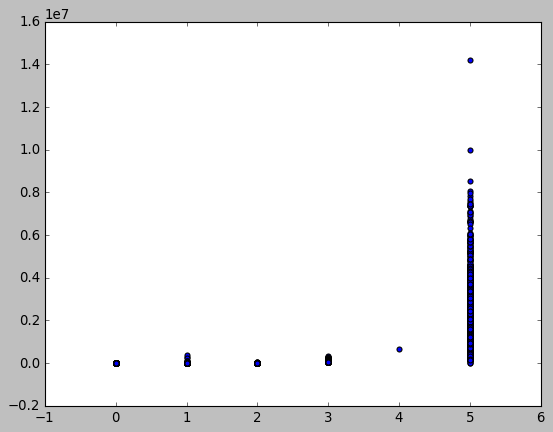

In [210]:
import matplotlib.pyplot as plt
plt.scatter(instadf['followers'],instadf['likes'])
plt.show()

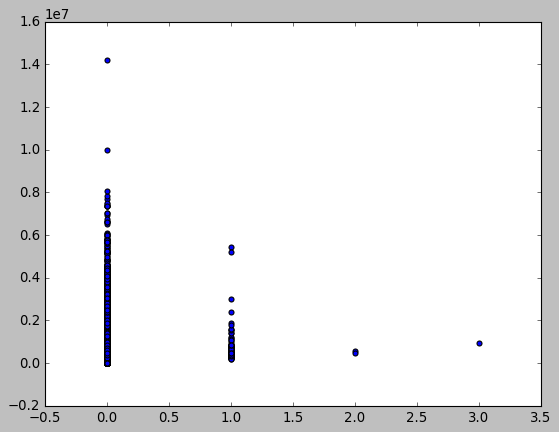

In [211]:
plt.scatter(x_train[:, [701]], y_train)
plt.show()

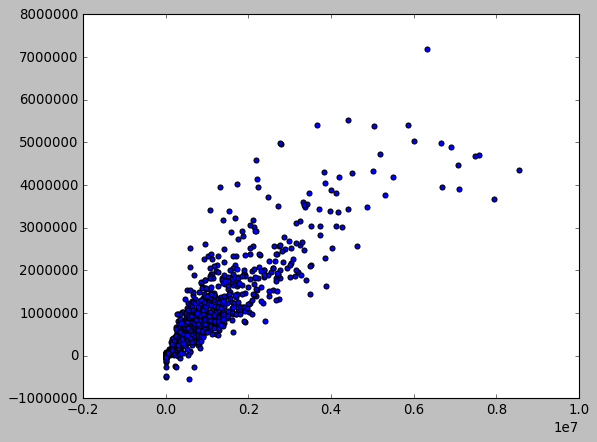

In [212]:
plt.scatter(y_test, y_pred)
plt.show()

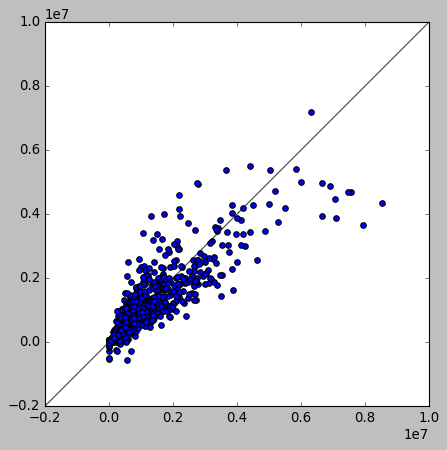

In [213]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, s=25, cmap=plt.cm.coolwarm, zorder=10)
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
plt.show()

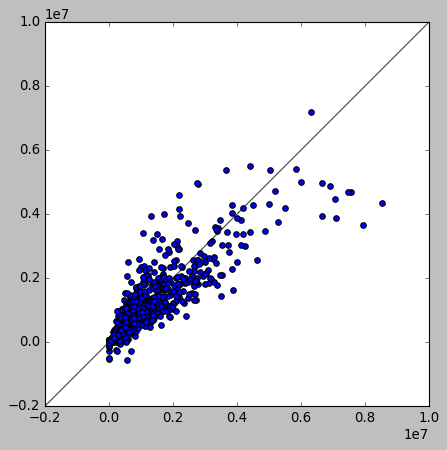

In [214]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, s=25, cmap=plt.cm.coolwarm, zorder=10)
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
plt.show()

# Linear Reggresion

In [215]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [216]:
model=LinearRegression()

In [217]:
fit=model.fit(x_train,y_train)

In [218]:
predictions=model.predict(x_test)

In [219]:
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))

0.7543273194786264
0.6739387659193203


# random forest

In [220]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 500, random_state = 0)

In [221]:
regressor.fit(x_train, y_train)
regressor.score(x_train,y_train)*100

96.85259141802844

In [222]:
regressor.score(x_test,y_test)*100

80.2161976869002

## visualization

C:\Users\kousa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



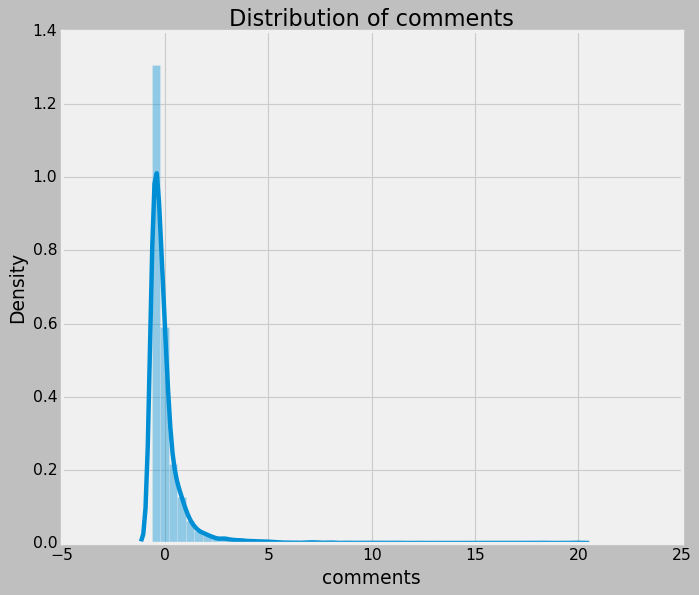

In [223]:
#ok
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of comments")
sns.distplot(instadf['comments'])
plt.show()

C:\Users\kousa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



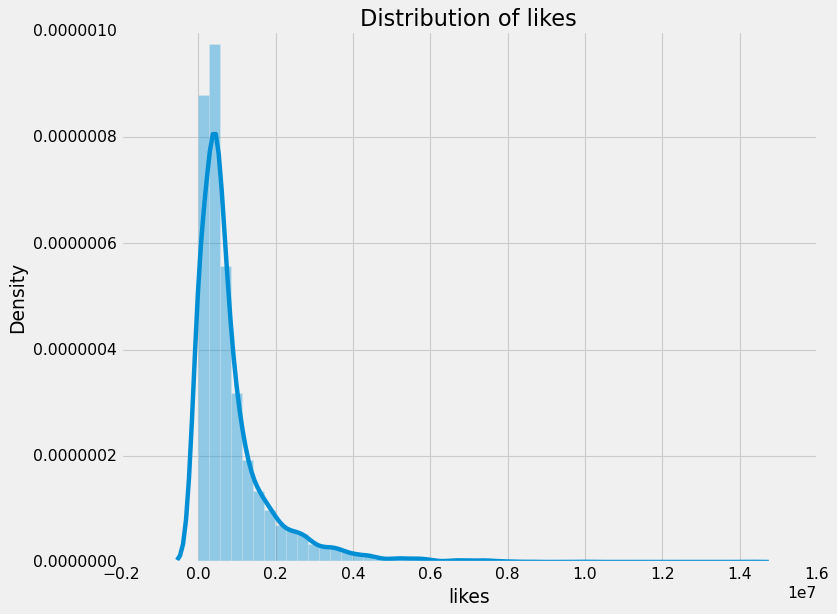

In [224]:
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of likes")
sns.distplot(instadf['likes'])
plt.show()

<AxesSubplot:xlabel='year', ylabel='comments'>

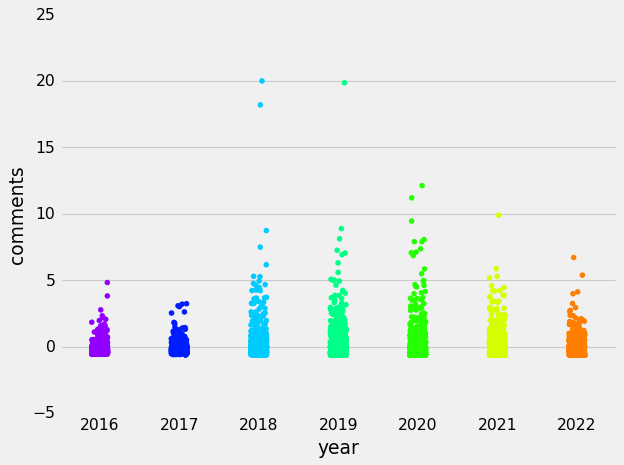

In [225]:
sns.stripplot(y='comments',x='year',data=instadf,palette='gist_rainbow_r')

<AxesSubplot:xlabel='year', ylabel='likes'>

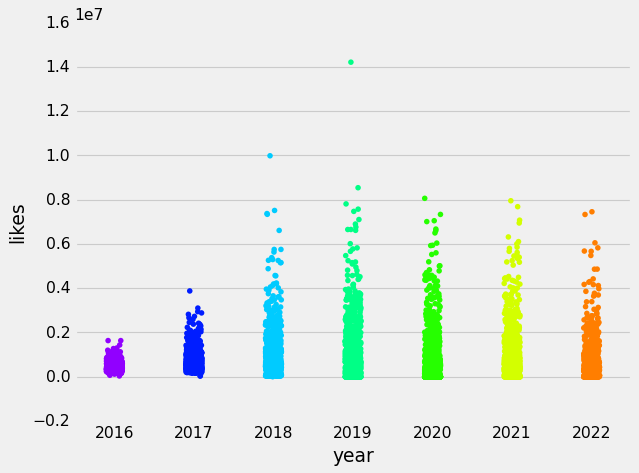

In [226]:
sns.stripplot(y='likes',x='year',data=instadf,palette='gist_rainbow_r')

C:\Users\kousa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



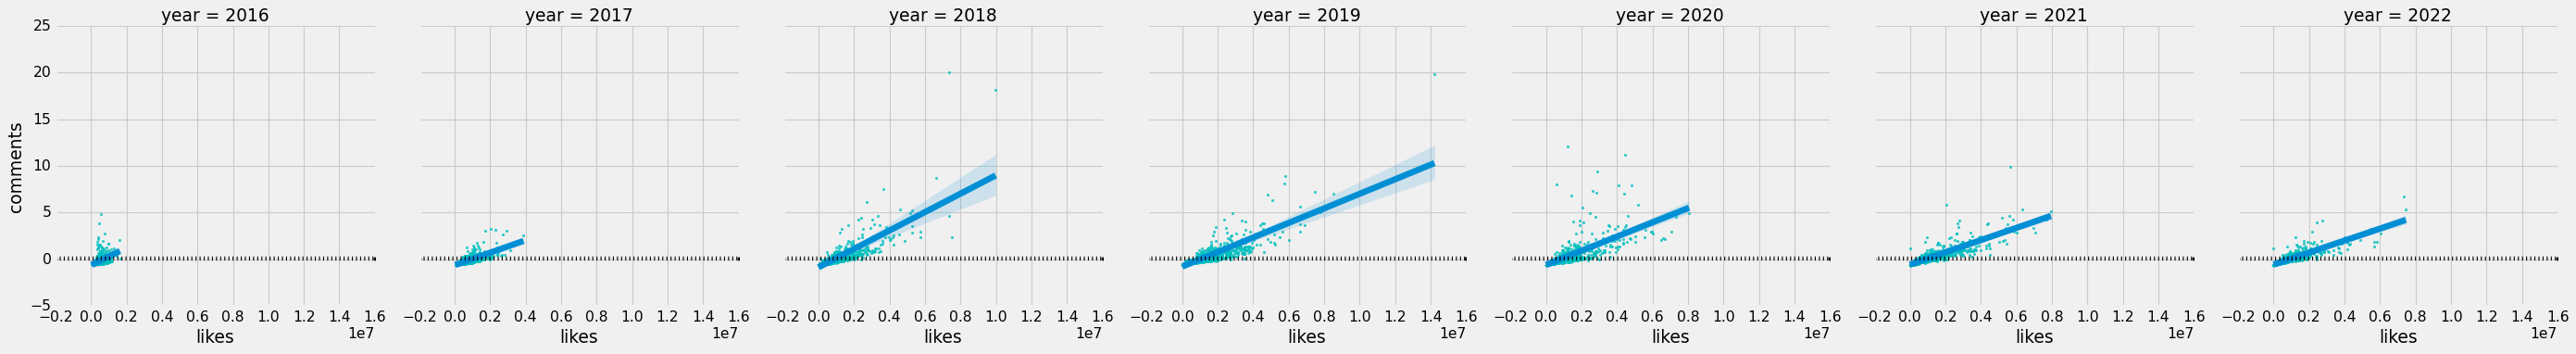

In [227]:
g = sns.lmplot('likes', 'comments', col='year', data=instadf,
               markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.1, color="k", ls=":")

In [228]:
import plotly.express as px

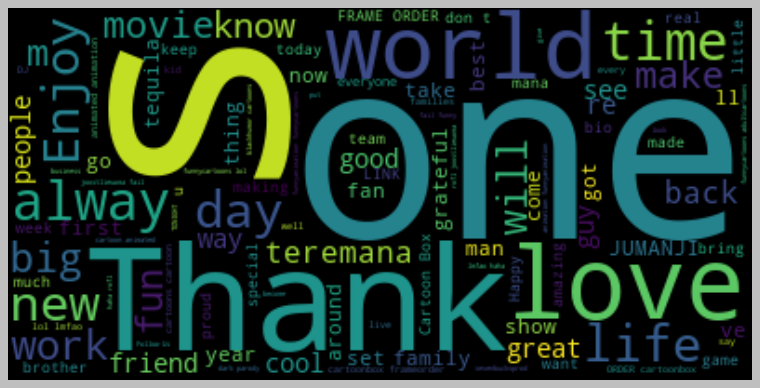

In [229]:
text1 = " ".join(i for i in instadf.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text1)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [230]:
fig = px.box(instadf, y="likes")
fig.show()

In [231]:
fig = px.scatter(instadf, x="comments", y="likes", facet_col="year",)
fig.show()

In [232]:
figure = px.scatter(data_frame = instadf, x="likes",
                    y="comments", size="year", trendline="ols", 
                    )
figure.show()

//////////////////////////////////////////////////////////////////////////////////////////////

In [233]:
# visualizations

In [234]:
instadf.head()

index                      filename  \
0      0  2017-12-10_10-01-38_UTC.json   
1      1  2017-12-20_09-01-11_UTC.json   
2      2  2018-01-25_07-49-42_UTC.json   
3      3  2018-02-01_11-29-36_UTC.json   
4      4  2018-02-08_10-20-38_UTC.json   

                                                text  likes  comments  \
0  Frank The Fat Horse\nCartoon-Box 17\n\n#cartoo...  38693 -0.610739   
1  Cleaning the Museum\nCartoon-Box 65\nPlease su...  32389 -0.629294   
2  How To Solve Erection Problems\nCartoon-Box 69...  55739 -0.476274   
3  The Best Way To Deliver A Baby\nCartoon-Box 70...  56456 -0.601931   
4  How To Be A Good Neighbour\nCartoon-Box 71\n#c...  37761 -0.610269   

   username  followers              post_id  followees  no_of_posts  ...  \
0         0          3  1666647453708273837        586         6693  ...   
1         0          3  1673864740483879658        586         6693  ...   
2         0          3  1699919137768706098        586         6693  ...   
3         0          3  1705104723752040129        586         6693  ...   
4         0          3  1710142745983936650        586         6693  ...   

        date    time_s  year Month  Date  Hour  Minute  Sec  \
0 2017-12-10  15:31:38  2017    12    10    15      31   38   
1 2017-12-20  14:31:11  2017    12    20    14      31   11   
2 2018-01-25  13:19:42  2018     1    25    13      19   42   
3 2018-02-01  16:59:36  2018     2     1    16      59   36   
4 2018-02-08  15:50:38  2018     2     8    15      50   38   

                                         description  \
0            Frank The Fat Horse\nCartoon-Box 17\n\n   
1  Cleaning the Museum\nCartoon-Box 65\nPlease su...   
2   How To Solve Erection Problems\nCartoon-Box 69\n   
3  The Best Way To Deliver A Baby\nCartoon-Box 70...   
4       How To Be A Good Neighbour\nCartoon-Box 71\n   

                                            hashtags  
0  cartoon #animated #trojanhorse #troy #horse #h...  
1  cartoon #animation #animated #funnyvideos #fun...  
2  cartoon #funny #erection #erectionproblems #fa...  
3  cartoon #animation #animated #funnyvideos #fun...  
4  cartoons #cartoon #animated #funnyvideo #funny...  

[5 rows x 22 columns]

In [235]:
fig = px.scatter_3d(instadf, x='comments', y='likes', z='year',color='year',
               size_max=18,
               opacity=0.7)
 
# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

In [236]:
fig = px.funnel(instadf, x='year', y='likes')
fig.show()

In [237]:
df = px.data.tips()
fig = px.ecdf(instadf, x="likes", color="year")
fig.show()

In [238]:
fig = px.bar(instadf, x='year', y='likes',color='Month')
fig.show()